In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls /content

drive  gdrive  sample_data


In [ ]:
import zipfile

In [1]:
'''
Uncomment the below files to Extract the zip file
'''
#with zipfile.ZipFile("/content/gdrive/MyDrive/trainPart1.zip", 'r') as zip_ref:
#   zip_ref.extractall("/content/gdrive/MyDrive")


'\nUncomment the below files to Extract the zip file\n'

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.layers import Dense, Input, InputLayer, Flatten
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, AveragePooling2D, Dropout
from keras.models import Sequential

from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [ ]:
tf.__version__

'2.4.1'

In [ ]:
'''
Function name : loadImg
loads all the images of given parent directory containing images of a paticular class name
converts images to greyscale and then shrinks the image by applying intercubic interpolation
Shrinks the image to 28 by 28 numpy array and normalize the array elements in range of [0,1] 

Params : 
  parent - parent dir
  img_data - list of images (data)
  class_name - list of class corresponding to images in img_data (list of label)
  className - class name to be appended in class_name list
returns
  - None
  - Returns elements via pass by reference back to the calling method/namespace
'''
def loadImg(parent,img_data,class_name,className):
  print(parent)
  test_folder=r'/content/gdrive/MyDrive/train/'+parent
  print(test_folder)
  val = os.listdir(test_folder)
  print(val)
  c = 0
  for img in val:
      image_path = os.path.join(test_folder,img)
      imcv = cv2.imread(image_path)
      gray = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
      stretch_near = cv2.resize(gray, (28, 28),interpolation = cv2.INTER_CUBIC)
      if c==0:
        print(className)
        plt.imshow(stretch_near)
      c=c+1
      img_data.append(np.array(stretch_near)/255)
      class_name.append(className)
  

In [ ]:
'''
Function name : create_dataset
  Traverses through the dataset directory and as per the serial number number of directory assigns 
  class name and label to corresponding image in a dataset
Params : 
  No params
returns
  - Returns the list containing all the images and their corresponding class label
'''

def create_dataset():
    img_data_array=[]
    class_name=[]
    # perform image reading for digits
    # each folder has 55 images
    for i in range(1,11): #read all the digits from 0 to 9 
      pre = ""
      if(len(str(i))>1):
        pre = "0"+str(i)
      else:
        pre = "00"+str(i)

      parent = "Sample"+pre        
      loadImg(parent,img_data_array,class_name,str(i-1))
    for i in range(11,37): #read alphabates upper case
      pre = ""
      if(len(str(i))>1):
        pre = "0"+str(i)
      else:
        pre = "00"+str(i)

      parent = "Sample"+pre        
      loadImg(parent,img_data_array,class_name,str(i-1))
    for i in range(37,63): #read alphabates lower case
      pre = ""
      if(len(str(i))>1):
        pre = "0"+str(i)
      else:
        pre = "00"+str(i)

      parent = "Sample"+pre        
      loadImg(parent,img_data_array,class_name,str(i-1))

    return img_data_array, class_name


Sample001
/content/gdrive/MyDrive/train/Sample001
['img001-054.png', 'img001-045.png', 'img001-043.png', 'img001-027.png', 'img001-034.png', 'img001-037.png', 'img001-012.png', 'img001-019.png', 'img001-002.png', 'img001-003.png', 'img001-004.png', 'img001-047.png', 'img001-007.png', 'img001-008.png', 'img001-033.png', 'img001-011.png', 'img001-025.png', 'img001-051.png', 'img001-014.png', 'img001-016.png', 'img001-029.png', 'img001-001.png', 'img001-010.png', 'img001-053.png', 'img001-013.png', 'img001-018.png', 'img001-052.png', 'img001-046.png', 'img001-021.png', 'img001-030.png', 'img001-026.png', 'img001-009.png', 'img001-036.png', 'img001-017.png', 'img001-049.png', 'img001-050.png', 'img001-042.png', 'img001-044.png', 'img001-055.png', 'img001-024.png']
0
Sample002
/content/gdrive/MyDrive/train/Sample002
['img002-020.png', 'img002-004.png', 'img002-052.png', 'img002-006.png', 'img002-047.png', 'img002-050.png', 'img002-045.png', 'img002-048.png', 'img002-009.png', 'img002-053.pn

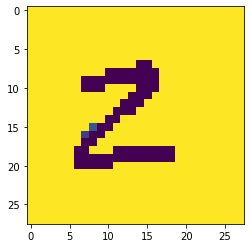

In [ ]:
img_data_array, class_name = create_dataset() # creating dataset


In [ ]:
  img_data = np.array(img_data_array) #converting img_data to a numpy vector

In [ ]:
len(class_name)

2480

In [ ]:
label_data = np.array(list(map(int,class_name))) #converting the class label to numpy vector

In [ ]:
label_data.shape # checking for shape

(2480,)

In [ ]:
img_data=img_data.reshape(len(img_data),28,28,1)
# reshaping the input 

In [ ]:
#pkfile = open("/content/gdrive/MyDrive/Task1Pk/mydata.pkl","wb") #dumping the loaded processed image 

In [ ]:
#code for dumping the preprocessed data in a pickle file
'''
datadict = {}
datadict["img"] = img_data
datadict["class"] = label_data

import pickle
pickle.dump(datadict,pkfile)
'''
# code for loading the pickle dump o processed data
#uncomment for loading the data insted of loading the data
'''
import pickle

f = open('/content/gdrive/MyDrive/Task1Pk/mydata.pkl', 'rb') 
dict_data = pickle.load(f)
'''

In [ ]:
kernel_size = 3   # Length of the 2d convolution kernel is taken as 3
max_pool = 2      # size of max pooling window
EPOCHS = 70                                  # Number of epochs
batch_size = 32                              # Batch size
iteration_per_epoc = len(img_data) // batch_size  
validations_per_epoc = len(label_data) // batch_size     

In [ ]:
model = Sequential()
#first layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(28, 18, 1))) 
model.add(MaxPooling2D((max_pool, max_pool))) 
#second layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) 
model.add(MaxPooling2D((max_pool, max_pool))) 
#third layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) 
model.add(MaxPooling2D((max_pool, max_pool))) 
#fourth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) 
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32*batch_size, activation='relu'))                                             
model.add(Dense(63, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 18, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 9, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 9, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 2, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 2, 128)         1

**Citations**


- https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c

- https://www.tensorflow.org/tutorials/images/cnn

- https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D

- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

- https://www.tensorflow.org/tutorials/images/data_augmentation


Performing image augumentation so as to increase the number of training examples and thus generate different orientation of images and this this would increase the accuracy of the convolutional neural network

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()                # for val/testing only rescaling function 

In [ ]:
train_gen = train_datagen.flow(img_data, label_data, batch_size=batch_size)
#val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
!pip install visualkeras #install visual keras


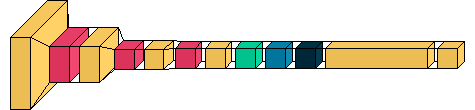

In [ ]:
import visualkeras

visualkeras.layered_view(model).show() 
visualkeras.layered_view(model)


Visual representation of the CNN


In [ ]:
m = model.fit_generator(
       train_gen,
       steps_per_epoch= iteration_per_epoc,
       epochs=300, 
       verbose = 1 ,# Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       shuffle = True
       )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
77/77 [==============================] - 34s 14ms/step - loss: 4.1454 - accuracy: 0.0127
Epoch 2/300
77/77 [==============================] - 1s 11ms/step - loss: 4.1396 - accuracy: 0.0173
Epoch 3/300
77/77 [==============================] - 1s 11ms/step - loss: 4.1355 - accuracy: 0.0190
Epoch 4/300
77/77 [==============================] - 1s 11ms/step - loss: 4.1338 - accuracy: 0.0146
Epoch 5/300
77/77 [==============================] - 1s 12ms/step - loss: 4.1328 - accuracy: 0.0194
Epoch 6/300
77/77 [==============================] - 1s 11ms/step - loss: 4.1306 - accuracy: 0.0152
Epoch 7/300
77/77 [==============================] - 1s 11ms/step - loss: 4.0544 - accuracy: 0.0267
Epoch 8/300
77/77 [==============================] - 1s 11ms/step - loss: 3.8378 - accuracy: 0.0529
Epoch 9/300
77/77 [==============================] - 1s 10ms/step - loss: 3.5479 - accuracy: 0.0741
Epoch 10/300
77/77 [==============================] - 1s 10ms/step - loss: 3.3797 - accuracy: 0.071

In [ ]:
# Total of 300 epochs had achieved maximum accuracy around 75%

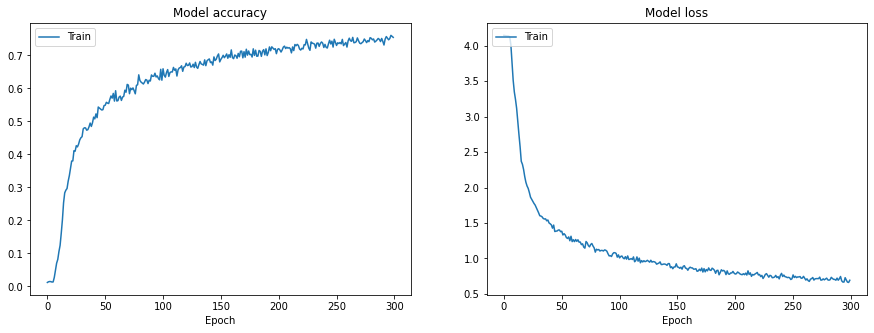

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

We get to observe that the model performs well and gives accuracy of more than 75% during training

In [ ]:
model.save_weights('/content/gdrive/MyDrive/Task1Pk/')


In [ ]:
model_1 = create_model()
# Restore the weights
model_1.load_weights('/content/gdrive/MyDrive/Task1Pk/')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 18, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 9, 32)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 9, 64)         18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 4, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 2, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 2, 128)        

In [ ]:
# Fetch required files
from keras.datasets import mnist
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.utils import np_utils

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
#Y_train = np_utils.to_categorical(Y_train, 10)
#Y_test = np_utils.to_categorical(Y_test, 10)


In [ ]:
Y_train.shape

(60000,)

In [ ]:
#model.fit(X_train, Y_train, batch_size=100, epochs=5,
#validation_split=0.1, verbose=1)
m = model_1.fit(
       X_train,
       Y_train,
       validation_data=(X_test, Y_test),
       batch_size = 77,
       epochs=20, 
       verbose = 1 ,# Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       shuffle = True
       )

Epoch 1/20
780/780 [==============================] - 5s 5ms/step - loss: 57.2510 - accuracy: 0.5726 - val_loss: 0.4136 - val_accuracy: 0.8860
Epoch 2/20
780/780 [==============================] - 4s 5ms/step - loss: 0.5920 - accuracy: 0.8373 - val_loss: 0.2125 - val_accuracy: 0.9384
Epoch 3/20
780/780 [==============================] - 4s 5ms/step - loss: 0.3491 - accuracy: 0.9011 - val_loss: 0.1556 - val_accuracy: 0.9543
Epoch 4/20
780/780 [==============================] - 4s 5ms/step - loss: 0.2532 - accuracy: 0.9276 - val_loss: 0.1265 - val_accuracy: 0.9636
Epoch 5/20
780/780 [==============================] - 4s 5ms/step - loss: 0.1995 - accuracy: 0.9447 - val_loss: 0.1150 - val_accuracy: 0.9658
Epoch 6/20
780/780 [==============================] - 4s 5ms/step - loss: 0.1644 - accuracy: 0.9535 - val_loss: 0.0888 - val_accuracy: 0.9756
Epoch 7/20
780/780 [==============================] - 4s 5ms/step - loss: 0.1356 - accuracy: 0.9618 - val_loss: 0.0833 - val_accuracy: 0.9747
Epoch

In [ ]:
#Lets evaluate the model with the test dataset

In [ ]:
loss, acc = model_1.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy is: {:5.2f}%".format(100 * acc))

313/313 - 1s - loss: 0.0400 - accuracy: 0.9883
Test accuracy is: 98.83%


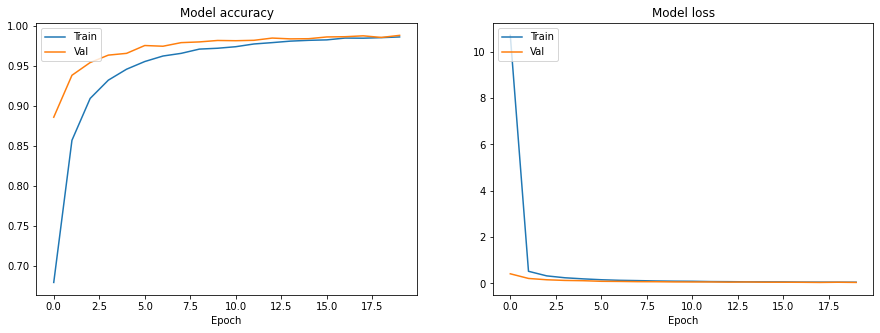

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [ ]:
model.save_weights('/content/gdrive/MyDrive/Task1Pk/Checkpoint2/')


In [ ]:
#Thus we have achieved a test accuracy of 98.96% with training the model with MNIST Dataset


How does this pretrained network perform in comparison to a randomly initialized network in terms of convergence time, final accuracy and other possible training quality metrics?

**Answer**
The model converges to an accuracy of 98.6%
- The model converges to 98.6% in just twenty Epochs
- The model is trained much faster than randomly initialized network


In [ ]:
#Saving Model Checkpoints

In [ ]:
def create_model():
  filters = 32 
  kernel_size = 3  
  max_pool = 2      
  EPOCHS = 70                                
  batch_size = 32                             
  iteration_per_epoc = 2480 // batch_size  
  validations_per_epoc = 2480 // batch_size     
  model2 = Sequential()

  # first layer
  model2.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(28, 18, 1))) # 32
  model2.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features

  # second layer
  model2.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 64
  model2.add(MaxPooling2D((max_pool, max_pool))) 

  # third layer
  model2.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
  model2.add(MaxPooling2D((max_pool, max_pool))) 

  # fourth layer
  model2.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
  model2.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

  model2.add(Flatten())
  model2.add(Dropout(0.5))
  model2.add(Dense(32*batch_size, activation='relu'))                                             # 512
  model2.add(Dense(63, activation='softmax'))
  model2.summary()
  model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model2


In [ ]:
# Create a new model instance
model2 = create_model()
# Restore the weights
model2.load_weights('/content/gdrive/MyDrive/Task1Pk/')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 18, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 9, 32)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 9, 64)         18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 4, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 2, 128)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 2, 128)        

In [ ]:
#Second mnist dataset function for data processing
'''
Function name : loadImgMnist3
loads all the images of given parent directory containing images of a paticular class name
converts images to greyscale and then shrinks the image by applying intercubic interpolation
Shrinks the image to 28 by 28 numpy array and normalize the array elements in range of [0,1] 

Params : 
  parent - parent dir
  img_data - list of images (data)
  class_name - list of class corresponding to images in img_data (list of label)
  className - class name to be appended in class_name list
returns
  - None
  - Returns elements via pass by reference back to the calling method/namespace
'''
def loadImgMnist3(parent,img_data,class_name,className):
  print(parent)
  images_list = []
  test_folder=r'/content/gdrive/MyDrive/mnistTask/'+parent
  print(test_folder)
  val = os.listdir(test_folder)
  print(val)
  c = 0
  for img in val:
      image_path = os.path.join(test_folder,img)
      imcv = cv2.imread(image_path)
      gray = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
      stretch_near = cv2.resize(gray, (28, 28),interpolation = cv2.INTER_CUBIC) #Intercubic Interpolation preserves greater details
      if c==0:
        print(className)
        plt.imshow(stretch_near)
      c=c+1
      img_data.append(np.array(stretch_near)/255)
      class_name.append(className)


In [ ]:
#creaing the dataset for the third dataset
'''
Function name : create_dataset
  Traverses through the dataset directory and as per the serial number number of directory assigns 
  class name and label to corresponding image in a dataset
Params : 
  No params
returns
  - Returns the list containing all the images and their corresponding class label
'''


def create_dataset():
    img_data_array=[]
    class_name=[]
    for i in range(1,11):
      pre = ""
      if(len(str(i))>1):
        pre = "0"+str(i)
      else:
        pre = "00"+str(i)

      parent = "Sample"+pre        
      loadImg(parent,img_data_array,class_name,str(i-1))
    return img_data_array, class_name


In [ ]:
img_mnist3, label_mnist3 = create_dataset()

/content


In [ ]:
!ls

gdrive	sample_data


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 18, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 9, 32)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 9, 64)         18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 4, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 3, 2, 128)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 3, 2, 128)       

In [ ]:
import pickle


In [ ]:
mnist_file_stream = open('/content/gdrive/MyDrive/examplePickle','rb')

In [ ]:
loaded_dict = pickle.load(mnist_file_stream)


In [ ]:
img2 = loaded_dict['img']
label = loaded_dict['label']

In [ ]:
img2 = np.array(img2)

In [ ]:
label = np.array(list(map(int,label)))

In [ ]:
label.shape

(60000,)

In [ ]:
X_train = img2.reshape(60000, 28, 28, 1)
Y_train = label

In [ ]:
m = model3.fit(
       X_train,
       Y_train,
       batch_size = 77,
       epochs=200, 
       verbose = 1 ,# Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       shuffle = True
       )

Epoch 1/200
780/780 [==============================] - 38s 11ms/step - loss: 3.5891 - accuracy: 0.0966
Epoch 2/200
780/780 [==============================] - 8s 11ms/step - loss: 2.3105 - accuracy: 0.1062
Epoch 3/200
780/780 [==============================] - 8s 11ms/step - loss: 2.3017 - accuracy: 0.1074
Epoch 4/200
780/780 [==============================] - 8s 11ms/step - loss: 2.2931 - accuracy: 0.1107
Epoch 5/200
780/780 [==============================] - 8s 11ms/step - loss: 2.2868 - accuracy: 0.1114
Epoch 6/200
780/780 [==============================] - 8s 11ms/step - loss: 2.2748 - accuracy: 0.1120
Epoch 7/200
780/780 [==============================] - 8s 11ms/step - loss: 2.2660 - accuracy: 0.1141
Epoch 8/200
780/780 [==============================] - 8s 11ms/step - loss: 2.2562 - accuracy: 0.1163
Epoch 9/200
780/780 [==============================] - 8s 11ms/step - loss: 2.2463 - accuracy: 0.1144
Epoch 10/200
780/780 [==============================] - 8s 11ms/step - loss: 2.23

In [ ]:
model3.save_weights('/content/gdrive/MyDrive/Task1Pk/model3/')


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten
from keras.utils import np_utils
(X_train1, Y_train1), (X_test, Y_test) = mnist.load_data()
X_train1 = X_train1.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
# Create a new model instance
model3 = create_model()
# Restore the weights
model3.load_weights('/content/gdrive/MyDrive/Task1Pk/model3/')
m = model3.fit(
       X_train1,
       Y_train1,validation_data=(X_test, Y_test),
       batch_size = 77,
       epochs=20, 
       verbose = 1 ,# Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       shuffle = True
       )
loss, acc = model3.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy {:5.2f}%".format(100 * acc))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 18, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 9, 32)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 9, 64)         18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 4, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 2, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 2, 128)        

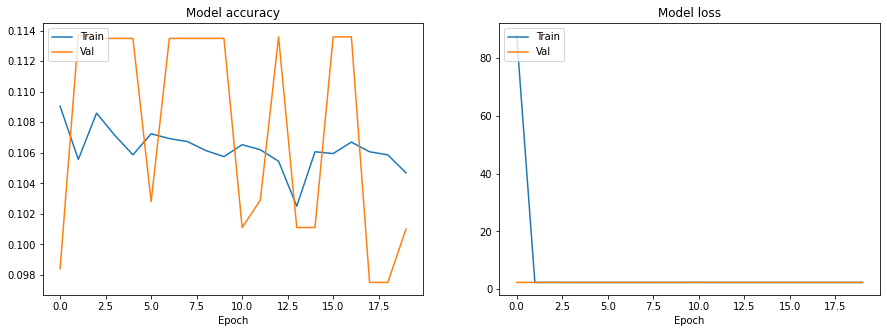

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [ ]:
model3.save_weights('/content/gdrive/MyDrive/Task1Pk/model4/')

Try and do qualitative analysis of what's different in this dataset?


**Answer**

In this dataset the digits were organized in floders from 0 to 9
The digits were randomly shuffeled and data set was not structured
Therefore the network could not train

